In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
file_path="D:/study/ml/数据分析资料/数据分析资料/day04/code/IMDB-Movie-Data.csv"
df=pd.read_csv(file_path)
print(df.head(1))
print(df.info())

   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121   

   Rating   Votes  Revenue (Millions)  Metascore  
0     8.1  757074              333.13       76.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1

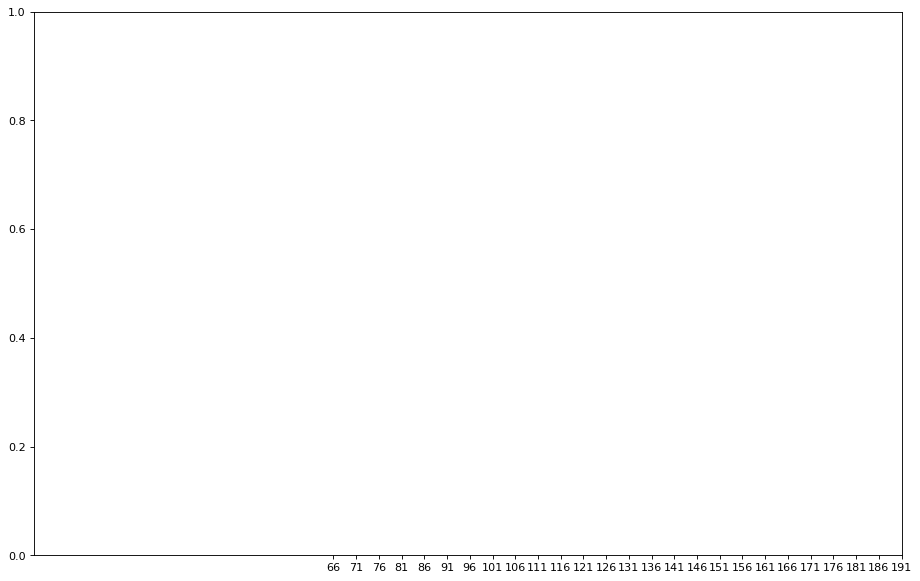

In [35]:
runtime_data=df["Runtime (Minutes)"].values
max_runtime=runtime_data.max()
min_runtime=runtime_data.min()

num_bin=(max_runtime-min_runtime)//5
plt.figure(figsize=(14,9),dpi=80)
(runtime_data,num_bin)
plt.xticks(range(min_runtime,max_runtime+5,5))
plt.show()

In [36]:
#获取电影平均评分
df_mean=df["Rating"].mean()
print(df_mean)
#导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique()))
#获取演员人数
temp_actor_list=df["Actors"].str.split(",").tolist()
actor_list=[i for j in temp_actor_list for i in j]
actor_num=len(set(actor_list))
print(actor_num)

6.723199999999999
644
644
2394


     Horror  Animation  Mystery  Action  Drama  Thriller  Biography  Music  \
0       0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
1       0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
2       0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
3       0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
4       0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
..      ...        ...      ...     ...    ...       ...        ...    ...   
995     0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
996     0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
997     0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
998     0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   
999     0.0        0.0      0.0     0.0    0.0       0.0        0.0    0.0   

     Family  Comedy  Western  Sport  Sci-Fi  Fantasy  Musical  

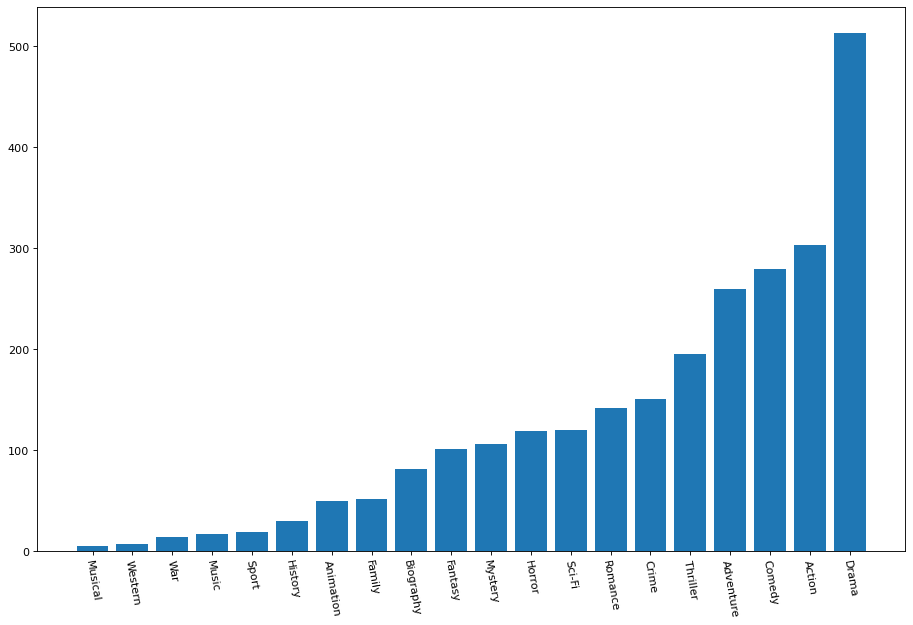

In [56]:
temp_list=df["Genre"].str.split(",").tolist()
genre_list=list(set([i for j in temp_list for i in j]))
zero_df=pd.DataFrame(np.zeros((df.shape[0],len(genre_list))),columns=genre_list)
print(zero_df)
for i in range(df.shape[0]):
    zero_df.loc[i,temp_list[i]]=1
#统计每个分类的电影的数量和
genre_count=zero_df.sum(axis=0)
print(genre_count)
#排序
genre_count=genre_count.sort_values()
_x=genre_count.index
_y=genre_count.values
#画图
plt.figure(figsize=(14,9),dpi=80)
plt.bar(range(len(_x)),_y)
plt.xticks(range(len(_x)),_x,rotation=280)
plt.show()